### SCT Hit Word Study

In an SCT cluster word (which falls under an SCT module word), bits 14-12 represent the width of H1 and 30-28 represent the width of Hit2. For more information, see here under module format: https://goo.gl/M4pDzg. We are interested in the distribution of these widths in SCT readout drivers in Lab4.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

#### Parsing (problematic) SCT input lane

In [59]:
# Input lane 7 is SCT lane according to the multiboard file for this run
inlane = "/Users/ChristianHaroldNunez/Desktop/CERN/ATLAS/advanced/SpyDump_20180817_103301/DF_0x2b7f8209.txt"
# Input lane 11 (for comparison)
# inlane = "/Users/ChristianHaroldNunez/Desktop/CERN/ATLAS/advanced/SpyDump_20180817_103301/DF_0x2f7f8209.txt"

with open(inlane) as infile:
    laneWords = []
    for word_i, word in enumerate(infile):
        word = word.strip()
        laneWords.append(word)

# Buffer is vectorized, now pick out the hit clusters
hitClusters = []
collectClusters = False
for word in laneWords:
    if collectClusters:
        if word[2:6] == '8000' and word[2:7] != '80000':
            continue
        elif word[2:6] == 'e0da':
            collectClusters = False
        else:
            hitClusters.append(word)
    else:
        if word[2:6] == '8000' and word[2:7] != '80000':
            collectClusters = True    

#### Extracting Hit Width from Hit Clusters and Plotting Result

In [60]:
def getHit1Width(hitCluster):
    i = int(hitCluster, 16)
    return int(bin(i >> 12 & 0b111), 2)

def getHit2Width(hitCluster):
    i = int(hitCluster, 16)
    return int(bin(i >> 28 & 0b111), 2)

In [61]:
hit1Widths = []
hit2Widths = []
for hitCluster in hitClusters:
    hit1Widths.append(getHit1Width(hitCluster))
    hit2Widths.append(getHit2Width(hitCluster))

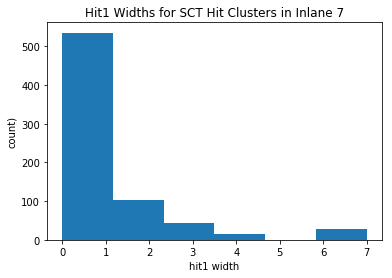

In [62]:
plt.hist(hit1Widths, bins = 6)
plt.title("Hit1 Widths for SCT Hit Clusters in Inlane 7")
plt.xlabel("hit1 width")
plt.ylabel("count")
plt.show()

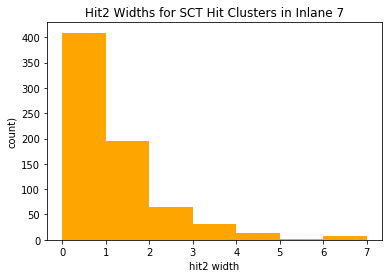

In [63]:
plt.hist(hit2Widths, color='orange', bins = 7)
plt.title("Hit2 Widths for SCT Hit Clusters in Inlane 7")
plt.xlabel("hit2 width")
plt.ylabel("count")
plt.show()